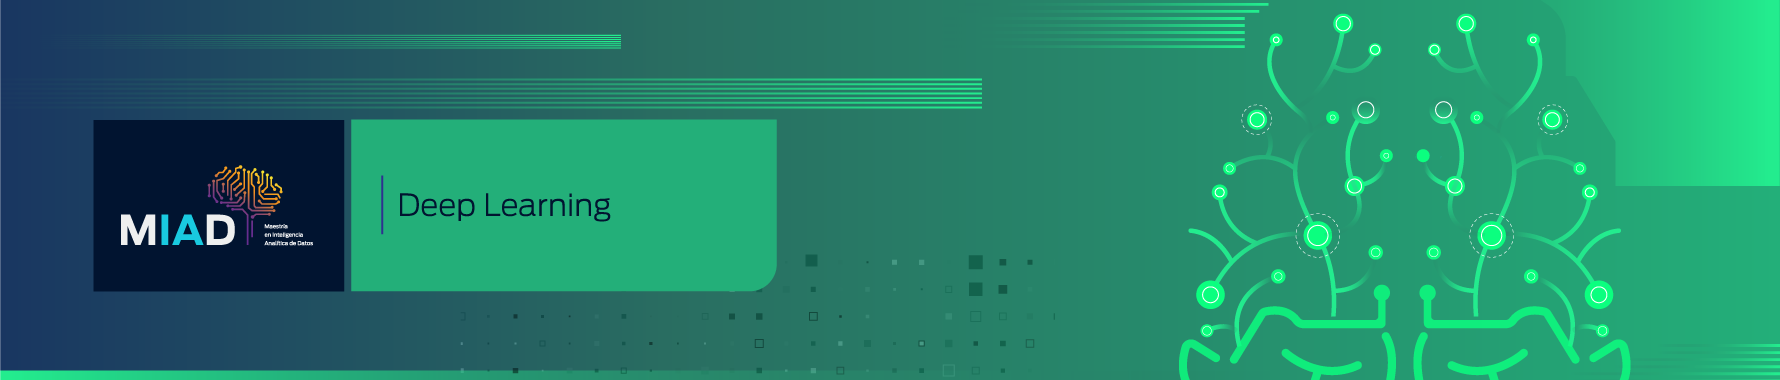



## Estimación de red neuronal con múltiples capas (Multilayer Perceptor)

### Propósito 

En este *notebook*, deberán aplicar sus conocimientos sobre la construcción y calibración de una red neuronal de tipo _feedforward_. Para ello, deberán entregar un _notebook_ en el cual se desarrolle una red neuronal de dos capas ocultas y cuya calibración se realice con el método de gradiente descendiente.

### Instrucciones generales

1. Descarguen este *notebook* y agréguenlo al repositorio de su preferencia  para que lo puedan trabajar grupalmente.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso. Nota: el archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Pasos para implementar manualmente el algoritmo de descenso de gradiente

1. Cargar los datos 
2. Separar la muestra 
3. Definir funciones de la red neuronal
4. Realizar el ensamblaje de la función de red neuronal
5. Predecir utilizando la red neuronal 
6. Evaluar la predicción

### 1. Cargar los datos

Para realizar la actividad, cargue los datos a usar en este *notebook*  que fueron extraídos de imágenes que fueron tomadas de billetes. Para su digitalización, se utilizó una cámara industrial usada para la impresión. Luego, las imágenes de 400x400 pixeles se sometieron a un procedimiento de transformación de onda (Wavelet transformation) con la intención de extraer los features para la predicción.

En este contexto, la variable de respuesta corresponde a si un billete es auténtico (y=1) o si no lo es (y=0) y las variables predictivas son las siguientes:


1. *variance* *of* *Wavelet* *Transformed* *image* *(continuous)*
2. *skewness* *of* *Wavelet* *Transformed* *image* *(continuous)*
3. *curtosis* *of* *Wavelet* *Transformed* *image* *(continuous)*
4. *entropy* *of* *image* *(continuous)*

In [82]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

Luego, realice la separación de los datos en entrenamiento y evaluación. Además, podemos observar las dimensiones de estos datos como se muestra a continuación:

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('X Train dimensiones: ', X_train.shape)
print ('Y Train dimensiones: ', y_train.shape)
print ('X Test dimensiones: ', X_test.shape)
print ('Y Test dimensiones: ', y_test.shape)

X Train dimensiones:  (1097, 4)
Y Train dimensiones:  (1097,)
X Test dimensiones:  (275, 4)
Y Test dimensiones:  (275,)


### Actividad de programación

Para esta actividad deberán construir una red neuronal con un diseño particular y un procedimiento de gradiente descendiente para la estimación de los parámetros de dicha red, sin el uso de librerías adicionales a las que se cargaron inicialmente en este notebook. A continuación se muestra la estructura de la red neuronal que se solicita:

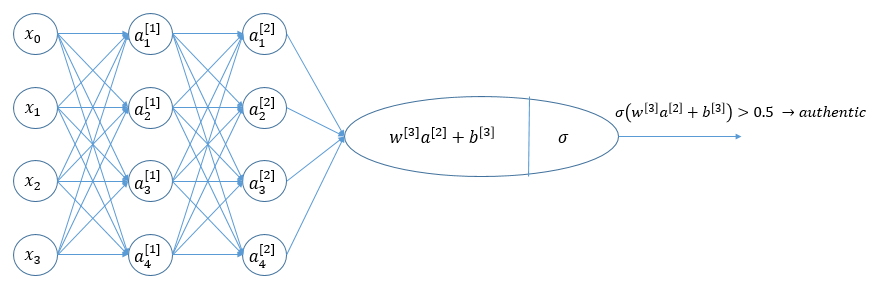

Figura 1. Diagrama de red neuronal de dos capas ocultas. 

Como se puede observar, se está solicitando una red neuronal de clasificación con dos capas ocultas, cada una de ellas con cuatro nodos.
Para lograr lo anterior, en esta actividad se espera que utilice como base el notebook "Redes neuronales: calibración de una red neuronal de una capa".

In [84]:
### Escriba sus procedimientos para realizar la actividad a partir de esta celda
import pandas as pd
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)

# Peek at the DataFrame
print(df.head())
print("\nDataFrame shape:", df.shape)
print("\nClass distribution:\n", df['class'].value_counts())




   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699    0.0
1   4.54590    8.1674   -2.4586 -1.46210    0.0
2   3.86600   -2.6383    1.9242  0.10645    0.0
3   3.45660    9.5228   -4.0112 -3.59440    0.0
4   0.32924   -4.4552    4.5718 -0.98880    0.0

DataFrame shape: (1372, 5)

Class distribution:
 class
0.0    762
1.0    610
Name: count, dtype: int64


In [85]:
# Reshape y-train, y_test
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

### 3.  Definir funciones de la red neuronal


Ahora, haremos una función que determine las dimensiones de los vectores que se utilizarán como input y output:

In [86]:
def estructuras(X, Y):
    input_unit = X.shape[1] # Dimensión de entrada
    hidden_unit_1 = 4 # Unidades de capa oculta 1
    hidden_unit_2 = 4 # Unidades de capa oculta 2
    output_unit = Y.shape[1] # Dimensión de variable de salida
    return (input_unit, hidden_unit_1, hidden_unit_2, output_unit)
(input_unit, hidden_unit_1, hidden_unit_2, output_unit) = estructuras(X_train, y_train)
print("Dimensión de capa entrada = " + str(input_unit))
print("Dimensión de capa oculta 1= " + str(hidden_unit_1))
print("Dimensión de capa oculta 2= " + str(hidden_unit_2))
print("Dimensión de capa de salida = " + str(output_unit))

Dimensión de capa entrada = 4
Dimensión de capa oculta 1= 4
Dimensión de capa oculta 2= 4
Dimensión de capa de salida = 1


Después haremos una función que, dada la dimensión de entrada de las capas ocultas y de salida, genere un valor aleatorio para la inicialización de los parámetros correspondientes:

In [87]:
def inicializacion(input_unit, hidden_unit_1, hidden_unit_2, output_unit):
    #Se fija una semilla (seed) igual a 2 para este ejercicio para poder reproducir los mismos resultados.
    np.random.seed(2) 
    W1 = np.random.randn(input_unit, hidden_unit_1)*0.01
    b1 = np.zeros((1, hidden_unit_1))
    W2 = np.random.randn(hidden_unit_1, hidden_unit_2)*0.01
    b2 = np.zeros((1, hidden_unit_2))
    W3 = np.random.randn(hidden_unit_2, output_unit)*0.01
    b3 = np.zeros((1, output_unit))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

También generamos una función para la activación de tipo sigmoide dada por:
    
$$f(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{1+e^{x}}$$

In [88]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Ahora, establecemos una función que permita realizar la propagación hacia adelante de la información en una red neuronal. Es decir, actualiazr el valor de todas las variables en la red en función de los valores correspondientes de los parámetros $W$ y $b$ en la iteración actual. Lo anterior se encuentra definido por la evaluación de la función sigmoide sobre el producto punto de los pesos por los valores de las neuronas más un intercepto:

In [89]:
def forward_propagation(X, parameters):
    
    #Se cargan los valores de los parámetros
    
    W1 = parameters['W1'] #Valor de los pesos de la primera capa
    b1 = parameters['b1'] #Valor de los interceptos de la primera capa
    W2 = parameters['W2'] #Valor de los pesos de la segunda capa
    b2 = parameters['b2'] #Valor de los interceptos de la segunda capa
    W3 = parameters['W3'] #Valor de los pesos de la salida
    b3 = parameters['b3'] #Valor de los interceptos de la salida
    
    Z1 = np.dot(X, W1) + b1 #Cálculo de la transformación afín de la primera capa
    A1 = sigmoid(Z1) #Evaluación de la función sigmoide de la primera capa
    Z2 = np.dot(A1, W2) + b2 #Cálculo de la transformación afín de la segunda capa
    A2 = sigmoid(Z2) #Evaluación de la función sigmoide de la segunda capa
    Z3 = np.dot(A2, W3) + b3 #Cálculo de la transformación afín de la salida
    A3 = sigmoid(Z3) #Evaluación de la función sigmoide de la salida
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2, "Z3": Z3,"A3": A3}
    
    return A3, cache

Luego, procedemos a definir la función de pérdida para los problemas de clasificación binarios. En este caso particular, se utilizará la función de entropia cruzada para una variable aleatoria con distribución Bernoulli, que corresponde a la función objetivo que se busca minimizar:

$$L(W,B)=-{1\over n}\sum_{i=1}^{n}y_{i}log(A^{[3]}_i)+(1-y_{i})log((1-A^{[3]}_i))$$

In [90]:
def cross_entropy_cost(A3, Y, parameters):
    # Muestras de entrenamiento
    n = Y.shape[0] 
    
    # Calcular cross entropy
    logprobs = np.multiply(np.log(A3), Y) + np.multiply((1-Y), np.log(1 - A3))
    cost = - np.sum(logprobs) / n
    cost = float(np.squeeze(cost))    
    
    return cost

Posteriormente, implementamos una función que calcule el gradiente de la función de pérdida con respecto a los parámetros de calibración de la red neuronal (pesos e interceptos). Para ello, recurrimos al procedimiento de backpropagation, el cual es una manera de calcular, numéricamente, este gradiente aprovechándose de la regla de la cadena, la cual resulta útil debido a que una red neuronal se puede interpretar como la composición de las funciones de activación de cada una de sus capas.

In [91]:
def backward_propagation(parameters, cache, X, Y):
    
    #Muestras de entrenamiento
    
    n = X.shape[0]
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']

    # Capa de salida
    dZ3 = (1/n) *(A3-Y)
    dW3 = np.dot(A2.T,dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    # Capa oculta 2
    dZ2 = np.multiply(np.dot(dZ3,W3.T), A2 - np.power(A2, 2))
    dW2 = np.dot(A1.T,dZ2) 
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Capa oculta 1
    dZ1 = np.multiply(np.dot(dZ2,W2.T), A1 - np.power(A1, 2))
    dW1 = np.dot(X.T,dZ1) 
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}
    
    return grads

Una vez se tiene la función para calcular el gradiente de la función de costo utilizando el método de backpropagation, se procede a utilizar este gradiente para actualizar los valores de los parámetros de acuerdo a una tasa de aprendizaje:

$$W(t+1)=W(t)-\alpha {\nabla}L(W(t))$$

In [92]:
def gradient_descent(parameters, grads, learning_rate = 0.1): #0.01
    
    #Se capturan los valores actuales para los parámetros de la red neuronal
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']


    #Se capturan los valores del gradiente para cada una de sus componentes
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    
    #Se actualizan los valores de los parámetros siguiendo la dirección contraria del gradiente
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

    parameters = {"W1": W1, "b1": b1,
                  "W2": W2, "b2": b2,
                  "W3": W3, "b3": b3}
    
    return parameters

### 4. Realizar el ensamblaje de la función de red neuronal

Se utilizan todos los procedimientos definidos anteriormente para calibrar los parámetros de una red neuronal:

In [93]:
# Celda de Prueba
X=X_train
Y=y_train
hidden_unit_1=4
hidden_unit_2=4
num_iterations=15000
input_unit = estructuras(X, Y)[0]
output_unit = estructuras(X, Y)[3]

#Se inicializan los parámetros de manera aleatoria
parameters = inicializacion(input_unit, hidden_unit_1, hidden_unit_2, output_unit)
   
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

costs=[]

In [94]:
# Celda de Prueba
(np.dot(X, W1)).shape

(1097, 4)

In [95]:
def neural_network_model(X, Y, hidden_unit_1, hidden_unit_2, learning_rate= 0.01, num_iterations = 10000):
    np.random.seed(3)
    
    input_unit = estructuras(X, Y)[0]
    output_unit = estructuras(X, Y)[3]
    
    #Se inicializan los parámetros de manera aleatoria
    parameters = inicializacion(input_unit, hidden_unit_1, hidden_unit_2, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    costs=[]
    
    
    for i in range(0, num_iterations):  
                
        A3, cache = forward_propagation(X, parameters) #Se calcula la salida de la red para los datos utilizados y los valores de los parámetros para cada iteración
        
        cost = cross_entropy_cost(A3, Y, parameters) #Se calcula la función de costos
        
        costs.append(cost) #Se guardan el valor de la función de costos para cada iteración
        
        grads = backward_propagation(parameters, cache, X, Y) #Se calcula el gradiente de la función de costos utilizando el método de backpropagation para cada iteración
        
        parameters = gradient_descent(parameters, grads, learning_rate) #Se actualiza el valor de los parámetros de acuerdo al gradiente calculado en cada iteración
        if i % 5 == 0:
            print ("Costo en la iteracion  %i: %f" %(i, cost))
    return parameters, costs



In [96]:
# Entrenamiento de la Red
parameters1, costs1 = neural_network_model(X_train, y_train, 4, 4, learning_rate= 0.01, num_iterations=15000)

Costo en la iteracion  0: 0.692976
Costo en la iteracion  5: 0.692636
Costo en la iteracion  10: 0.692313
Costo en la iteracion  15: 0.692006
Costo en la iteracion  20: 0.691714
Costo en la iteracion  25: 0.691436
Costo en la iteracion  30: 0.691171
Costo en la iteracion  35: 0.690919
Costo en la iteracion  40: 0.690680
Costo en la iteracion  45: 0.690452
Costo en la iteracion  50: 0.690236
Costo en la iteracion  55: 0.690030
Costo en la iteracion  60: 0.689834
Costo en la iteracion  65: 0.689648
Costo en la iteracion  70: 0.689470
Costo en la iteracion  75: 0.689302
Costo en la iteracion  80: 0.689141
Costo en la iteracion  85: 0.688988
Costo en la iteracion  90: 0.688843
Costo en la iteracion  95: 0.688705
Costo en la iteracion  100: 0.688574
Costo en la iteracion  105: 0.688449
Costo en la iteracion  110: 0.688330
Costo en la iteracion  115: 0.688217
Costo en la iteracion  120: 0.688109
Costo en la iteracion  125: 0.688007
Costo en la iteracion  130: 0.687909
Costo en la iteracion  

In [97]:
parameters2, costs2 = neural_network_model(X_train, y_train, 4, 4, learning_rate= 0.1, num_iterations=15000)

Costo en la iteracion  0: 0.692976
Costo en la iteracion  5: 0.690187
Costo en la iteracion  10: 0.688515
Costo en la iteracion  15: 0.687511
Costo en la iteracion  20: 0.686909
Costo en la iteracion  25: 0.686546
Costo en la iteracion  30: 0.686328
Costo en la iteracion  35: 0.686197
Costo en la iteracion  40: 0.686118
Costo en la iteracion  45: 0.686070
Costo en la iteracion  50: 0.686042
Costo en la iteracion  55: 0.686024
Costo en la iteracion  60: 0.686014
Costo en la iteracion  65: 0.686008
Costo en la iteracion  70: 0.686004
Costo en la iteracion  75: 0.686001
Costo en la iteracion  80: 0.686000
Costo en la iteracion  85: 0.685999
Costo en la iteracion  90: 0.685999
Costo en la iteracion  95: 0.685998
Costo en la iteracion  100: 0.685998
Costo en la iteracion  105: 0.685998
Costo en la iteracion  110: 0.685998
Costo en la iteracion  115: 0.685998
Costo en la iteracion  120: 0.685998
Costo en la iteracion  125: 0.685997
Costo en la iteracion  130: 0.685997
Costo en la iteracion  

### 5. Predecir utilizando la red neuronal
Ahora, una vez se han calibrado los parámetros, predecimos la variable de respuesta utilizando la función "forward_propagation" que establecimos anteriormente:

In [98]:
def prediction(parameters, X):
    A3, cache = forward_propagation(X, parameters)
    predictions = np.round(A3)
    return predictions

### 6. Evaluar la predicción
Las métricas de desempeño para esta predicción se muestran enseguida:

#### *Learning Rate 0.01*

In [99]:
predictions_tr_1 = prediction(parameters1, X_train)
acc_train1 = ((np.dot(y_train.T, predictions_tr_1) + np.dot(1 - y_train.T, 1 - predictions_tr_1)) / y_train.size * 100).item()
print('Accuracy Train: %d%%' % acc_train1)
predictions_tst_1 = prediction(parameters1, X_test)
acc_test1 = ((np.dot(y_test.T, predictions_tst_1) + np.dot(1 - y_test.T, 1 - predictions_tst_1)) / y_test.size * 100).item()
print('Accuracy Test: %d%%' % acc_test1)

Accuracy Train: 55%
Accuracy Test: 53%


#### *Learning Rate 0.1*

In [100]:
predictions_tr_2 = prediction(parameters2, X_train)
acc_train2 = ((np.dot(y_train.T, predictions_tr_2) + np.dot(1 - y_train.T, 1 - predictions_tr_2)) / y_train.size * 100).item()
print('Accuracy Train: %d%%' % acc_train2)
predictions_tst_2 = prediction(parameters2, X_test)
acc_test2 = ((np.dot(y_test.T, predictions_tst_2) + np.dot(1 - y_test.T, 1 - predictions_tst_2)) / y_test.size * 100).item()
print('Accuracy Test: %d%%' % acc_test2)

Accuracy Train: 100%
Accuracy Test: 100%


A continuación podemos ver la disminución de la función de costos en cada iteración del procedimiento de calibración:

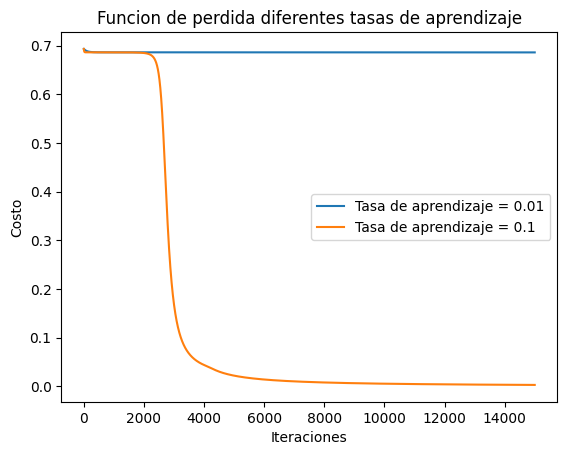

In [107]:
plt.plot(costs1, label='Tasa de aprendizaje = 0.01')
plt.plot(costs2, label='Tasa de aprendizaje = 0.1')
plt.legend()
plt.ylabel('Costo')
plt.xlabel('Iteraciones')
plt.title("Funcion de perdida diferentes tasas de aprendizaje" )
plt.show()

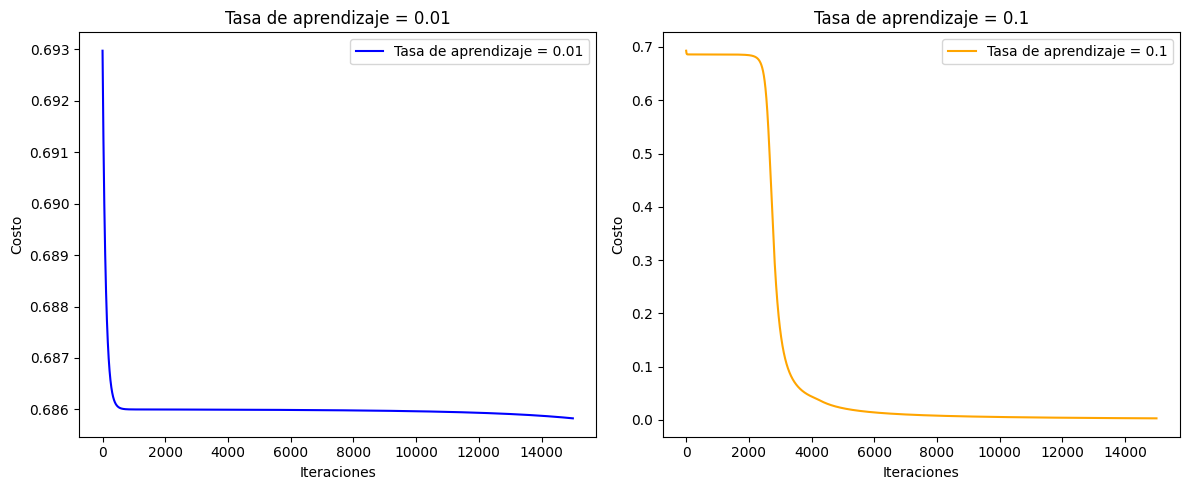

In [106]:

# Crear una figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primera gráfica (azul)
axes[0].plot(costs1, color='blue', label='Tasa de aprendizaje = 0.01')
axes[0].set_title("Tasa de aprendizaje = 0.01")
axes[0].set_xlabel('Iteraciones')
axes[0].set_ylabel('Costo')
axes[0].legend()

# Segunda gráfica (naranja)
axes[1].plot(costs2, color='orange', label='Tasa de aprendizaje = 0.1')
axes[1].set_title("Tasa de aprendizaje = 0.1")
axes[1].set_xlabel('Iteraciones')
axes[1].set_ylabel('Costo')
axes[1].legend()

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()